<a href="https://colab.research.google.com/github/DrJHSIM/Portfolio_JHSIM/blob/main/Regression_PJT_%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Mini PJT

- `California Housing` 데이터셋을 이용하여 선형회귀 문제를 풀어봅니다.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- 단순 선형회귀를 통해 각 Feature들을 이용하여 집값을 예측해봅니다.


- 20640개의 row, 8개의 column으로 구성되어 있습니다.


- 각 feature별 영향력을 알아보고, 테스트 해봅니다.

### 1. 데이터 및 라이브러리 불러오기

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# California 데이터 불러오기
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']
data = pd.concat([X, y], axis=1)

display(X)
display(y)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [4]:
# 결측치를 확인합니다. --> 결측치 x
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# 필요없는 column을 제거합니다.
# 모든 column을 사용합니다!

### 3. EDA

- feature distribution

- target distribution



In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


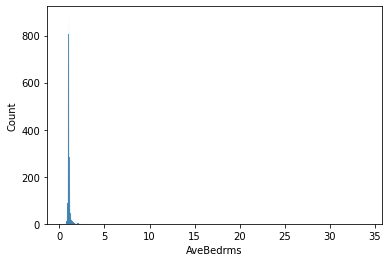

In [8]:
# feature distribution
sns.histplot(data=data, x="AveBedrms")

In [9]:
data.AveBedrms.value_counts()

1.000000    288
1.125000     29
1.058824     26
1.100000     25
1.083333     25
           ... 
0.932886      1
0.906883      1
1.164894      1
1.030853      1
1.162264      1
Name: AveBedrms, Length: 14233, dtype: int64

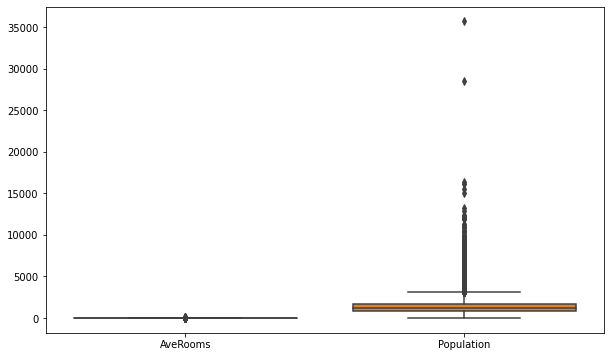

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.loc[:, [ "AveRooms", "Population"]])
plt.show()

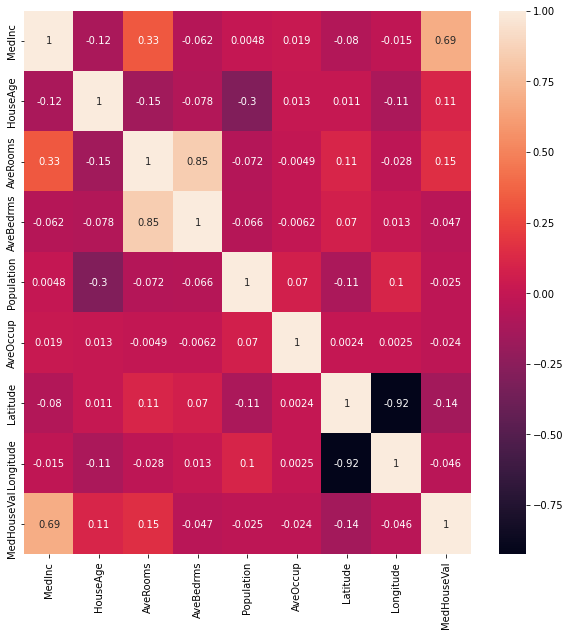

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [13]:
#data.loc[data.AveRooms > 100, :] # 1914, 1979 row 제거
#data.loc[data.AveOccup > 200, :] # 3364, 13034, 16669, 19006 row 제거
# AveBedrms, Longitude column 제거
data = data.drop(index=[1914, 1979, 3364, 13034, 16669, 19006]) ## remove outlier
data = data.drop(columns=["AveBedrms", "Longitude"]) ## remove collinearity
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


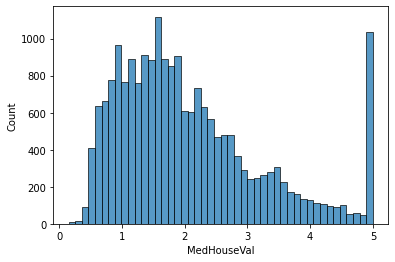

In [14]:
# target distribution
sns.histplot(data=data, x="MedHouseVal")

### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [15]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

# 트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# 6 : 2 : 2 = train : validation : test
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


In [16]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error

In [18]:
## training
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)


print("1. Linear Regression\t, train=%.4f, val=%.4f" % (mse_train, mse_val))
print("2. Lasso\t\t, train=%.4f, val=%.4f" % (mse_train2, mse_val2))
print("3. Ridge\t\t, train=%.4f, val=%.4f" % (mse_train3, mse_val3))
print("4. XGBoost\t\t, train=%.4f, val=%.4f" % (mse_train4, mse_val4))
print("5. LightGBM\t\t, train=%.4f, val=%.4f" % (mse_train5, mse_val5))

[05:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression	, train=0.5144, val=0.5297
2. Lasso		, train=1.3246, val=1.3734
3. Ridge		, train=0.5144, val=0.5297
4. XGBoost		, train=0.2596, val=0.2885
5. LightGBM		, train=0.1450, val=0.2264


In [19]:
# Hyper-parameter tuning
# 1. Human Search
# 2. Grid Search(GridSearchCV) : 주어진 hp의 조합을 모두 돌려보는 방식.
# 3. Bayesian Optimization(hyperopt, optuna, ...) : hyper-parameter를 최적화하는 베이지안 방식을 사용.

# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth" : [3, 4, 5, 6, 7, -1], # 6
    "learning_rate" : [0.1, 0.01, 0.05], # 3
    "n_estimators" : [50, 100, 200] # 3
} # 6x3x3 = 54

gcv = GridSearchCV(reg5, param_grid, scoring='neg_mean_squared_error', verbose=1)
gcv.fit(X_train, y_train)
#print(gcv.cv_results_)
print(gcv.best_estimator_)
print(gcv.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
LGBMRegressor(n_estimators=200)
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}


### 5. Test(Prediction)

In [20]:
# training set과 같은 전처리! V
final_model = gcv.best_estimator_

In [21]:
# prediction!
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [22]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result4))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result5))

---------- Linear Regression ---------
MSE in training: 0.5618
---------- Lasso ---------
MSE in training: 1.3106
---------- Ridge ---------
MSE in training: 0.5617
---------- XGBoost ---------
MSE in training: 0.2967
---------- LightGBM ---------
MSE in training: 0.2164
